# Homework 3 

## Exploratory Data Analysis - IRIS Data

As a first step of this report, an EDA is going to be performed on the IRIS Data in order to explore and gain insight into the data

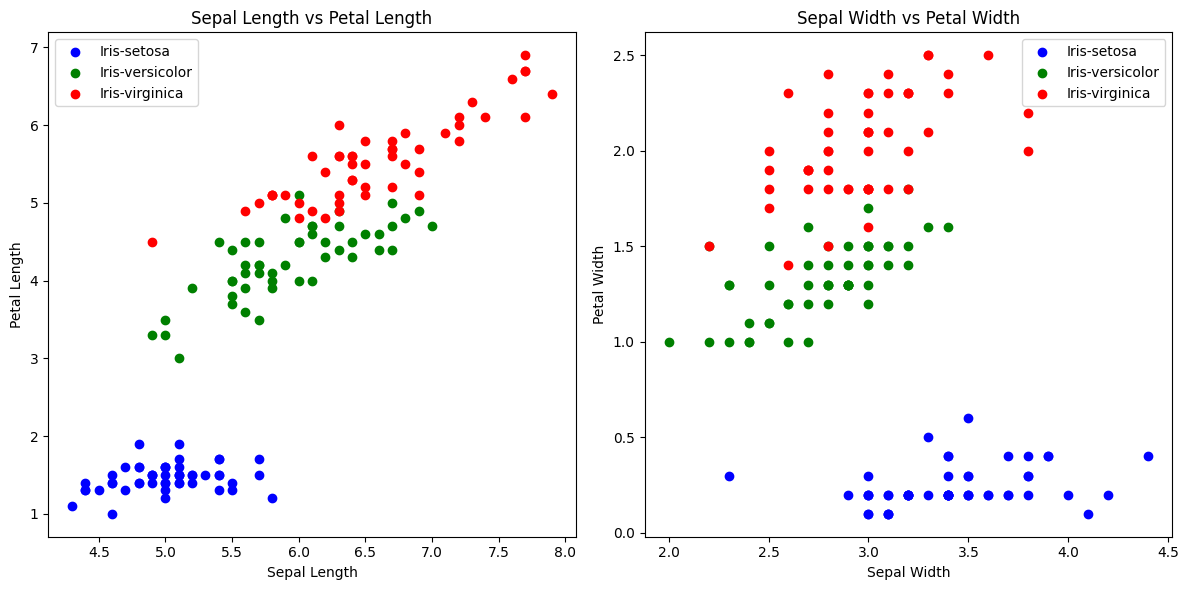

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_species = pd.read_csv('IRIS.csv')
data_arter = pd.read_csv('artportalen.csv')
data_stroke = pd.read_csv('stroke-data.csv')

colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'}


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot 1: Sepal Length vs Petal Length
axes[0].set_title('Sepal Length vs Petal Length')
for species, color in colors.items():
    subset = data_species[data_species['species'] == species]
    axes[0].scatter(subset['sepal_length'], subset['petal_length'], label=species, color=color)
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Petal Length')
axes[0].legend()

# Plot 2: Sepal Width vs Petal Width
axes[1].set_title('Sepal Width vs Petal Width')
for species, color in colors.items():
    subset = data_species[data_species['species'] == species]
    axes[1].scatter(subset['sepal_width'], subset['petal_width'], label=species, color=color)
axes[1].set_xlabel('Sepal Width')
axes[1].set_ylabel('Petal Width')
axes[1].legend()


plt.tight_layout()


plt.show()

The relationship between sepal dimensions and petal dimensions appear to be different depending on species. For Iris Setosa, there is barely no relationsship at all. However, for both Iris Versicolor and Iris Verginica, there is a linear relationsship between lenght and width. Although with a stronger linear relationsship for the lenght between sepal and petal. 

Now how are the sepal and petal dimensions distributed? Boxplots are a perfect illustration for this

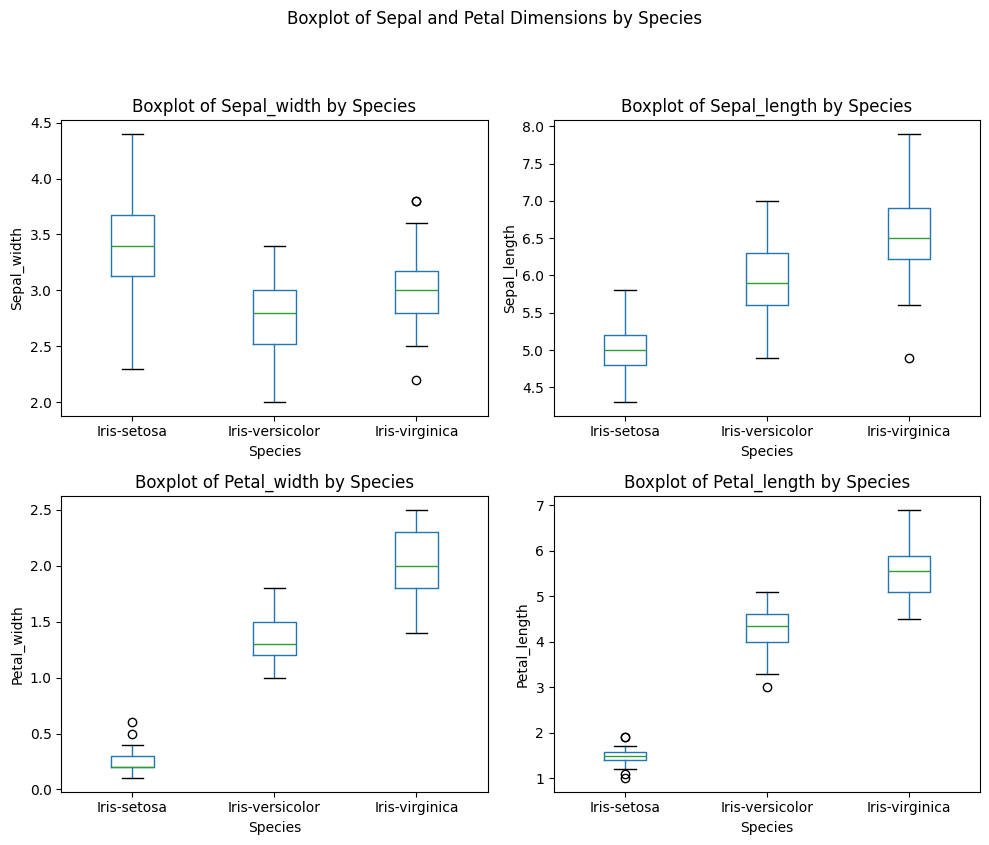

In [4]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes = axes.flatten()

# Loop through each column and create a boxplot for each species
columns = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length']
for i, column in enumerate(columns):
    data_species.boxplot(column=column, by='species', ax=axes[i], grid=False)
    axes[i].set_title(f'Boxplot of {column.capitalize()} by Species')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(column.capitalize())


plt.tight_layout()
plt.suptitle('Boxplot of Sepal and Petal Dimensions by Species', y=1.05)


plt.show()

First we notice that some of the distributions are skewed. For the sepal dimensions, the Iris-Setosa is pretty symmetric while for the Iris-Versicolor and Iris-Virginica the distribution is a bit skewed, with Iris-Versicolor having a large spread of values and Iris-Virginica being left-skewed for the sepal dimensions. Iris-setosa has a larger sepal width-to-length ratio than the others. Moreover, there is a bigger difference in the distribution for Iris-Setosa compared to the other group for the dimensions. And while the spread of data for Iris-Setosa is relatively large for sepal dimensions (especially for the length), it is very concentrated for petal dimensions. Conclusion: the distribution for Iris-Setosa deviates the most in terms of spread, values and ratio. 

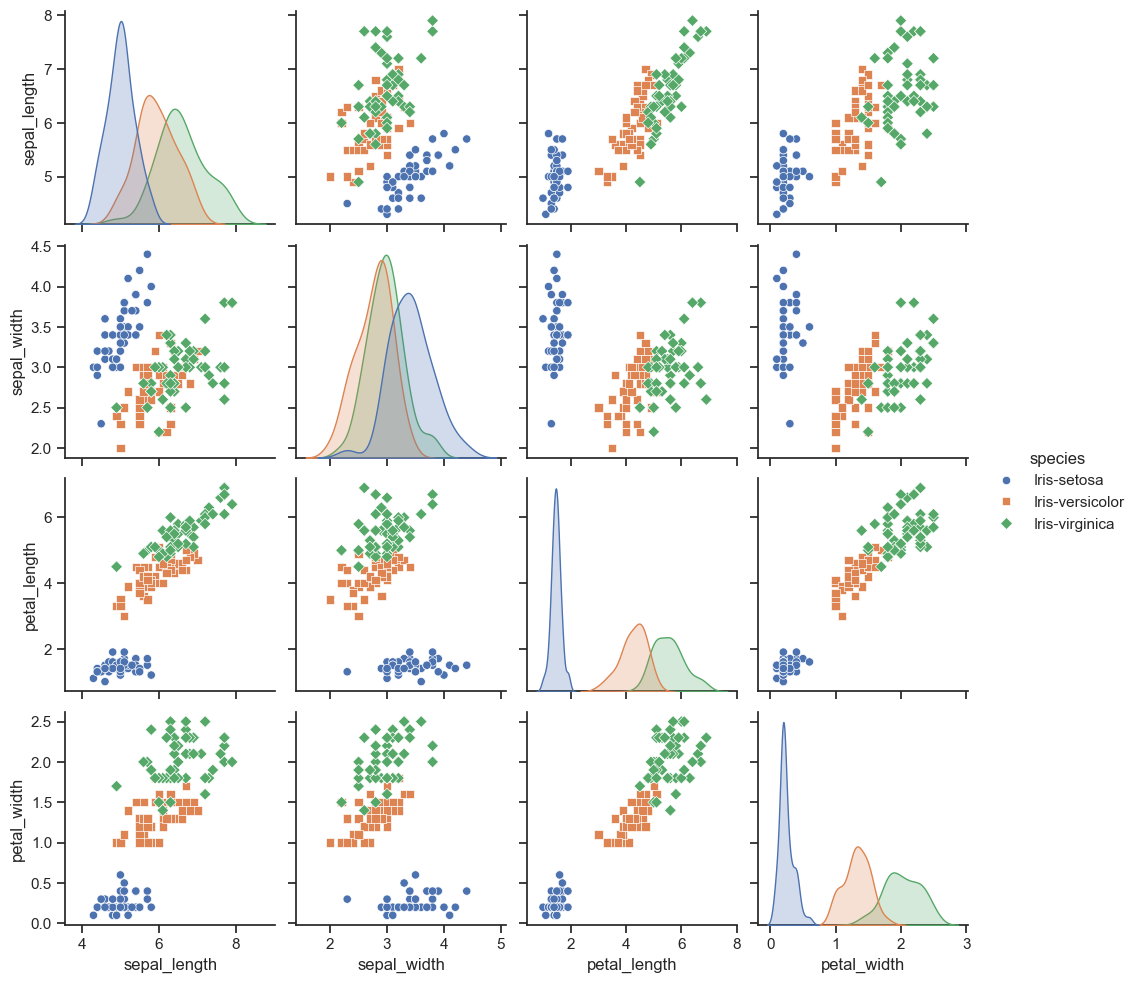

In [5]:
dimensions = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data_dimensions = data_species[dimensions]

data_dimensions['species'] = data_species['species']

sns.set(style="ticks")
sns.pairplot(data_dimensions, hue="species", markers=["o", "s", "D"])

plt.show()

The relationship between Sepal_width and Sepal_length is that of a linear relationship between the variables. This relationship is stronger for Iris-Setosa and weaker for the others. Iris-setosa has distinct differences compared to the two others, which are more intertwined with a missing subgroup differences.

Petal length and sepal length on the other hand has more distinct clusters with Iris-Versicolor and Iris-Viriginica being more clearly linear in this dimension. Iris-setosa does not appear to have any linear relationship. 

Petal length and Sepal width, as well as petal width and sepal length along with petal width and sepal width, all show similiar patterns as mentioned above. This indicates that there are some kind of relationship between the petal and sepal dimensions. 

Lastly, petal width and petal length appear to have a clear linear relationship with subgroup differences. This indicates that there are different kinds of species characteristics  for the relationship between petal length and petal width. 

## Birdwatching

Let's begin to understand the dataset that is a result of citizen science. This is done by simply understanding how a the table looks like. The data format/type, potential null values and the column names.

In [25]:
print(data_arter.head(3))

print("\nDataFrame Info:")
print(data_arter.info())

print("\nColumns in the DataFrame:")
print(data_arter.columns)



         Id  Taxonsorteringsordning Rödlistade   Artnamn   Vetenskapligt namn  \
0  97785066                   55235        NaN  Koltrast        Turdus merula   
1  97785067                   54989        NaN    Blåmes  Cyanistes caeruleus   
2  97785310                   55235        NaN  Koltrast        Turdus merula   

             Auktor Antal Ålder/stadium  Kön Aktivitet  \
0    Linnaeus, 1758     2           NaN  NaN       NaN   
1  (Linnaeus, 1758)     2           NaN  NaN       NaN   
2    Linnaeus, 1758     1           NaN  NaN       NaN   

                          Lokalnamn  Ostkoordinat  Nordkoordinat  Noggrannhet  \
0  Björnstigen 129,Bergshamra,Solna       1626890        6586736           25   
1  Björnstigen 129,Bergshamra,Solna       1626890        6586736           25   
2                       Frösundavik       1626094        6585523          100   

   Diffusion        Län Kommun  Provins Församling Startdatum Starttid  \
0          0  Stockholm  Solna  Uppland    

Next step is to understand what the most prevalent species are in the dataset, i.e. which is the most occurante type of bird.  

In [27]:
most_prevalent_species = data_arter['Artnamn'].value_counts().head(5)

# Display the result
print("Most Prevalent Species:")
print(most_prevalent_species)

Most Prevalent Species:
Artnamn
Koltrast      718
Talgoxe       631
Blåmes        629
Gräsand       531
Storskrake    522
Name: count, dtype: int64


Next we are going to answer what is the monthly distribution of the top 3 most prevelant species. The data streches over a period of 6 months. To answer, I am going to count the occurences for each month and then group by month. 

In [28]:
data_arter['Startdatum'] = pd.to_datetime(data_arter['Startdatum'])

top_species = data_arter['Artnamn'].value_counts().nlargest(3).index

df_top_species = data_arter[data_arter['Artnamn'].isin(top_species)]

monthly_distribution = df_top_species.groupby([df_top_species['Startdatum'].dt.month, 'Artnamn']).size().unstack()
monthly_distribution.index.name = 'Månad'

print("Monthly Distribution of Top 3 Most Prevalent Species:")
print(monthly_distribution)


Monthly Distribution of Top 3 Most Prevalent Species:
Artnamn  Blåmes  Koltrast  Talgoxe
Månad                             
1           147       155      144
2           115       105      119
3           131       127      129
4            97       111       95
5           113       170      111
6            26        50       33


Now I am going to answer what the rarest species are, their names and their numbers. 

In [29]:

species_counts = data_arter['Artnamn'].value_counts()

min_count = species_counts.min()

rarest_species = species_counts[species_counts == min_count].index.tolist()

print("Rarest Species:")
print(rarest_species)
print(len(rarest_species))

Rarest Species:
['Ob. korsnäbb', 'Strömstare', 'Fjällvråk', 'Gråhakedopping', 'Doppingfåglar', 'Knipskrake', 'Forsärla', 'Röd glada', 'Bändelkorsnäbb', 'Trädlärka', 'Ob. gås', 'Ormvråk, underarten buteo', 'Tornfalk', 'Ljungpipare', 'Spetsbergsgås', 'Vinterhämpling', 'Fiskgjuse', 'Tundrasädgås', 'Spillkråka', 'Ob. bo-/bergfink', 'Mellanskarv', 'Rödbena', 'Gravand', 'Ob. fisk-/silvertärna', 'Lappsparv', 'Ejder', 'Ägretthäger', 'Nordlig gulärla', 'Kustlabb', 'Bivråk', 'Varfågel', 'Rosenfink', 'Storlom', 'Prutgås', 'Måsfåglar']
35


Now to the EDA, the first question: how many unique species are there? this question is important since it puts the above numbers into perspective. This gives us a sense of the distribution of species. 

In [30]:
num_unique_species = data_arter['Artnamn'].nunique()

print("Number of Unique Species:", num_unique_species)

Number of Unique Species: 173


The data set has a column over red-listed species where the NaN value is the most prevalent in this cateogory. What are the values that are not NaN? It makes sense that this would be a red-listed but are there subcategories? This is important to answer since we need to know what kind of "red-listed" species that we are dealing with. 

In [31]:

non_nan_rows = data_arter[data_arter['Rödlistade'].notna()]

unique_categories = non_nan_rows['Rödlistade'].unique()
print(unique_categories)


['NT' 'VU' 'EN']


When you google these terms you get, NT = near threatened, VU = vulnerable, EN = Endangered. Which species falls into which categories? this is a crucial question in the context,  since it will provide us with the species that are important to track in order to safeguard the health being of its population. 


In [32]:
for i in unique_categories:
    species_for_category = non_nan_rows.loc[non_nan_rows['Rödlistade'] == i, 'Artnamn']
    print(f"Species for category '{i}':")
    print(species_for_category.unique())
    print()

Species for category 'NT':
['Björktrast' 'Fiskmås' 'Havsörn' 'Gråkråka' 'Rödvingetrast' 'Kråka'
 'Skrattmås' 'Mindre hackspett' 'Smådopping' 'Duvhök' 'Entita' 'Fjällvråk'
 'Sävsparv' 'Gulsparv' 'Strandskata' 'Skedand' 'Stenfalk' 'Skräntärna'
 'Spillkråka' 'Svartvit flugsnappare' 'Drillsnäppa' 'Grönsångare'
 'Ärtsångare' 'Buskskvätta' 'Gravand' 'Rörsångare' 'Kustlabb' 'Rosenfink']

Species for category 'VU':
['Gråtrut' 'Havstrut' 'Tallbit' 'Stare' 'Tofsvipa' 'Kricka' 'Östersjötrut'
 'Bläsand' 'Kungsfiskare' 'Vinterhämpling' 'Lappsparv' 'Hussvala']

Species for category 'EN':
['Grönfink' 'Brunand' 'Storspov' 'Ejder' 'Tornseglare']



We now know which speices are near-threaten and requires attention.

## Predicting Strokes

First thing is to understand the content of the data set. A view into the first three rows makes it clear what kind of data this dataset holds and how it is structured. A very important variable is the response variable stroke, and it is therefore important to understand how many observations this falls under. 

In [38]:
print(data_stroke.head(3))
data_stroke['stroke'].value_counts()

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   

   stroke  
0       1  
1       1  
2       1  


stroke
0    4861
1     249
Name: count, dtype: int64

I want to explore how much own health choices effects the probability to get stroke. And although genetics plays a big part, the bmi and the average glucose level are both variables that are impacted by life choices. So the underlying question is, how much do controllable variables result in the likelihood of getting a stroke? 

In [39]:


grouped_data = data_stroke.groupby('stroke')['bmi'].describe()

print("Statistical Summary for where Stroke = 0:")
print(grouped_data.loc[0])

print("\nStatistical Summary for BMI where Stroke = 1:")
print(grouped_data.loc[1])



Statistical Summary for where Stroke = 0:
count    4700.000000
mean       28.823064
std         7.908287
min        10.300000
25%        23.400000
50%        28.000000
75%        33.100000
max        97.600000
Name: 0, dtype: float64

Statistical Summary for BMI where Stroke = 1:
count    209.000000
mean      30.471292
std        6.329452
min       16.900000
25%       26.400000
50%       29.700000
75%       33.700000
max       56.600000
Name: 1, dtype: float64


In [40]:
grouped_data2 = data_stroke.groupby('stroke')['avg_glucose_level'].describe()
print("Statistical Summary for where Stroke = 0:")
print(grouped_data2.loc[0])
print("Statistical Summary for where Stroke = 1:")
print(grouped_data2.loc[1])


Statistical Summary for where Stroke = 0:
count    4861.000000
mean      104.795513
std        43.846069
min        55.120000
25%        77.120000
50%        91.470000
75%       112.830000
max       267.760000
Name: 0, dtype: float64
Statistical Summary for where Stroke = 1:
count    249.000000
mean     132.544739
std       61.921056
min       56.110000
25%       79.790000
50%      105.220000
75%      196.710000
max      271.740000
Name: 1, dtype: float64


Now let to see if there is also a relationship between the two variables? we do this by plotting a scatter plot against each other. 

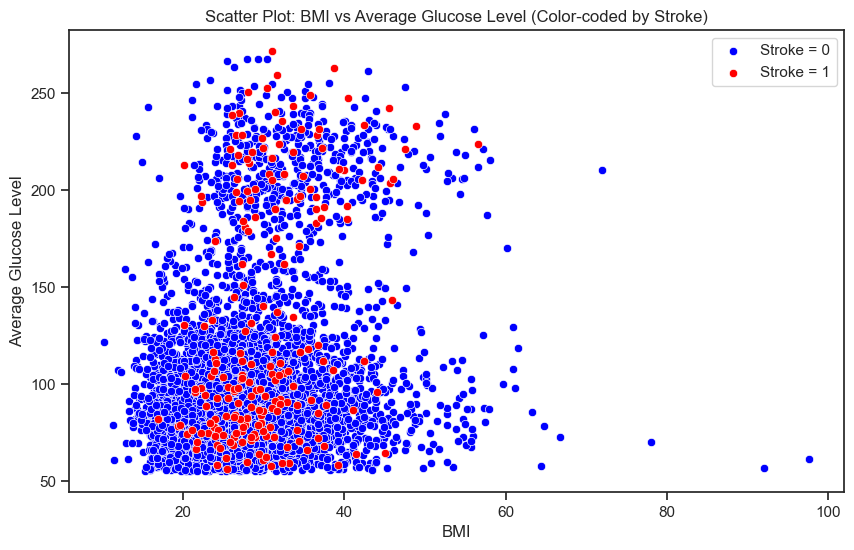

In [41]:
plt.figure(figsize=(10, 6))

# Scatter plot for 'stroke' = 0 (blue points)
sns.scatterplot(x='bmi', y='avg_glucose_level', data=data_stroke[data_stroke['stroke'] == 0], color='blue', label='Stroke = 0')

# Scatter plot for 'stroke' = 1 (red points)
sns.scatterplot(x='bmi', y='avg_glucose_level', data=data_stroke[data_stroke['stroke'] == 1], color='red', label='Stroke = 1')

plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.title('Scatter Plot: BMI vs Average Glucose Level (Color-coded by Stroke)')
plt.legend()
plt.show()

The relationship is not obvious but we can see that average glucose level tend to have a more dense portion of red dots. Is there a statistically significant difference between people having stroke and the two variables? 

In [45]:
#!pip install scipy

from scipy.stats import ttest_ind

# Separate data into two groups based on 'stroke' value
stroke_group_bmi = data_stroke[data_stroke['stroke'] == 1]['bmi']
no_stroke_group_bmi = data_stroke[data_stroke['stroke'] == 0]['bmi']

t_statistic, p_value = ttest_ind(stroke_group_bmi, no_stroke_group_bmi, nan_policy='omit')


print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print("The difference in BMI between people with and without stroke is statistically significant.")
else:
    print("There is no significant difference in BMI between people with and without stroke.")

T-Statistic: 2.9709426097788083
P-Value: 0.0029832690997420824
The difference in BMI between people with and without stroke is statistically significant.


In [46]:


stroke_group_av= data_stroke[data_stroke['stroke'] == 1]['avg_glucose_level']
no_stroke_group_av = data_stroke[data_stroke['stroke'] == 0]['avg_glucose_level']

# Perform t-test
t_statistic, p_value = ttest_ind(stroke_group_av, no_stroke_group_av, nan_policy='omit')

# Display results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Check if the p-value is below a significance threshold (e.g., 0.05)
if p_value < 0.05:
    print("The difference in average glucose level between people with and without stroke is statistically significant.")
else:
    print("There is no significant difference in average glucose level between people with and without stroke.")

T-Statistic: 9.513352175431471
P-Value: 2.7678105194741054e-21
The difference in average glucose level between people with and without stroke is statistically significant.


Yes, there seems to be a statisical difference between the two groups in relation to BMI and average glucose level. 

# Data preparation 
## Cleaning Data
Let us begin the clean up!

In [71]:
df_phones = pd.read_csv('cell_phones_total.csv')


print("Initial Dataset Info:")
print(df_phones.info())

print(df_phones.head(5))

print(df_phones.columns)

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso-3   214 non-null    object 
 1   1960    200 non-null    float64
 2   1965    200 non-null    float64
 3   1966    0 non-null      float64
 4   1967    0 non-null      float64
 5   1968    0 non-null      float64
 6   1969    0 non-null      float64
 7   1970    200 non-null    float64
 8   1971    0 non-null      float64
 9   1972    0 non-null      float64
 10  1973    0 non-null      float64
 11  1974    0 non-null      float64
 12  1975    200 non-null    float64
 13  1976    200 non-null    float64
 14  1977    200 non-null    float64
 15  1978    200 non-null    float64
 16  1979    200 non-null    float64
 17  1980    200 non-null    object 
 18  1981    199 non-null    object 
 19  1982    199 non-null    object 
 20  1983    198 non-null    object 
 21  1984    196 non-n

It is evident from the output above that the formating problem start 1980, so from this year to 2019 is our scope for cleaning. We will turn these cells to numbers. The missing values are difficult to deal with since a Null value in itself is important information - we don't know the value!

In [72]:
def convert_to_numeric(value):
    if pd.isnull(value):
        return value
    elif value == '0':
        return 0
    else:
        try:
            return float(value)
        except ValueError:
            multiplier = 1
            if 'K' in value:
                multiplier = 1e3
            elif 'M' in value:
                multiplier = 1e6
            elif 'B' in value:
                multiplier = 1e9

            # Check for exponent notation and convert to float
            if 'e' in value.lower():
                return float(value)
            
            # Extract the numeric part from the string and convert to float
            numeric_part = float(''.join(filter(str.isdigit, value)))
            
            # Multiply by the appropriate multiplier
            return numeric_part * multiplier



# Apply the conversion function to relevant columns
columns_to_convert = ['1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019']  
for column in columns_to_convert:
    df_phones[column] = df_phones[column].apply(convert_to_numeric)

pd.set_option('display.max_columns', None)

df_phones.head(10)

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.00e+00,0.00e+00,NaN,NaN,NaN,NaN,0.00e+00,NaN,NaN,NaN,NaN,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,2.00e+01,NaN,NaN,1.72e+03,3.00e+03,3.40e+03,5.38e+03,1.20e+01,1.50e+01,5.30e+01,6.18e+02,7.00e+01,9.84e+02,1.03e+02,1.09e+02,1.14e+02,1.21e+02,1.28e+02,1.32e+02,NaN,1.35e+02,1.39e+02,1.40e+02,1.41e+02,NaN,NaN,NaN,NaN
1,AFG,0.00e+00,0.00e+00,NaN,NaN,NaN,NaN,0.00e+00,NaN,NaN,NaN,NaN,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,2.50e+01,2.00e+02,6.00e+02,1.20e+07,2.52e+08,4.67e+08,7.90e+07,1.05e+08,1.02e+08,1.38e+08,1.53e+08,1.68e+08,1.84e+08,1.97e+08,2.16e+08,2.39e+08,2.20e+07,2.26e+08
2,AGO,0.00e+00,0.00e+00,NaN,NaN,NaN,NaN,0.00e+00,NaN,NaN,NaN,NaN,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.10e+03,1.82e+03,1.99e+03,3.30e+03,7.05e+03,9.82e+03,2.40e+01,2.58e+02,7.50e+01,1.40e+02,3.50e+02,7.40e+02,1.61e+08,3.05e+08,4.96e+08,6.77e+08,8.11e+08,9.40e+07,1.21e+08,1.28e+08,1.33e+08,1.41e+08,1.39e+08,1.30e+07,1.33e+08,1.33e+08,1.48e+08
3,ALB,0.00e+00,0.00e+00,NaN,NaN,NaN,NaN,0.00e+00,NaN,NaN,NaN,NaN,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,2.30e+03,3.30e+03,5.60e+03,1.10e+01,2.98e+02,3.93e+02,8.51e+02,1.10e+07,1.26e+08,1.53e+08,1.91e+08,2.32e+08,1.86e+08,2.46e+08,2.69e+08,3.10e+07,3.50e+07,3.69e+08,3.36e+08,3.40e+07,3.37e+08,3.63e+08,2.71e+08,2.63e+08
4,AND,0.00e+00,0.00e+00,NaN,NaN,NaN,NaN,0.00e+00,NaN,NaN,NaN,NaN,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,7.70e+02,7.80e+02,7.84e+02,2.83e+03,5.49e+03,8.62e+03,1.41e+02,2.06e+02,2.35e+02,2.94e+02,3.28e+02,5.19e+02,5.84e+02,6.46e+02,6.90e+01,6.35e+02,6.42e+02,6.45e+02,6.55e+02,6.50e+01,6.39e+02,6.39e+02,6.62e+02,7.13e+02,7.61e+02,8.03e+02,8.26e+02,8.79e+02
5,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.33e+03,3.56e+03,4.94e+03,7.92e+03,1.12e+02,1.37e+02,1.38e+02,2.49e+02,3.36e+02,4.30e+01,4.89e+02,7.06e+02,9.15e+02,1.29e+02,1.94e+02,3.09e+02,4.93e+02,8.32e+02,1.43e+08,1.91e+08,2.43e+08,2.97e+08,3.68e+08,4.53e+08,5.52e+08,7.73e+08,9.36e+08,1.07e+08,1.09e+08,1.17e+08,1.38e+08,1.61e+08,1.68e+08,1.79e+08,1.99e+08,1.98e+08,2.01e+08,1.96e+08
6,ARG,0.00e+00,0.00e+00,NaN,NaN,NaN,NaN,0.00e+00,NaN,NaN,NaN,NaN,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,2.30e+03,1.20e+01,2.50e+01,4.66e+02,1.12e+02,2.41e+02,4.05e+02,6.67e+02,2.01e+08,2.67e+08,3.85e+08,6.49e+08,6.74e+08,6.57e+08,7.84e+08,1.35e+08,2.22e+08,3.15e+08,4.04e+08,4.65e+08,5.25e+08,5.71e+08,6.07e+08,6.43e+08,6.74e+08,6.12e+08,6.18e+08,6.37e+08,6.19e+08,5.86e+08,5.86e+08
7,ARM,0.00e+00,0.00e+00,NaN,NaN,NaN,NaN,0.00e+00,NaN,NaN,NaN,NaN,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,3.00e+02,5.00e+03,7.83e+03,8.16e+03,1.75e+02,2.55e+02,7.13e+02,1.14e+02,2.03e+02,3.18e+02,1.26e+08,1.88e+08,1.44e+08,2.19e+08,3.87e+08,3.21e+08,3.32e+08,3.35e+08,3.46e+08,3.46e+08,3.43e+08,3.49e+08,3.58e+08,3.62e+08
8,ASM,0.00e+00,0.00e+00,NaN,NaN,NaN,Na

In the code above, case specific codes has been implemented inside a function that takes in a column. It works like this: 1. If the value is NaN or missing, the function returns it without any modification. 2.  It handles conversion from common string-based formats 3. For invalid inputs, the function returns NaN to preserve the missing data.

In [73]:

countries_to_keep = ['CHN', 'IND', 'USA', 'IDN', 'BRA']

# Define the list of columns to keep (including 'iso-3' for identification)
columns_to_keep = ['iso-3', '2015', '2016', '2017', '2018', '2019']

# Filter the DataFrame for the desired rows and columns
filtered_df = df_phones[df_phones['iso-3'].isin(countries_to_keep)][columns_to_keep]

# Display the filtered DataFrame
print(filtered_df)


    iso-3     2015     2016     2017     2018     2019
26    BRA 2.58e+08 2.44e+08 2.18e+08 2.07e+08      NaN
35    CHN 1.29e+11 1.36e+11 1.47e+11 1.65e+11 1.73e+11
86    IDN 3.39e+08 3.86e+08 4.35e+08 3.19e+08 3.45e+08
87    IND 1.00e+09 1.13e+11 1.17e+11 1.18e+11 1.15e+11
200   USA 3.82e+08 3.96e+08 4.00e+08 4.22e+08      NaN
